In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importa dati divisi per fasce d'età
Report del 15 Settembre, https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_15-settembre-2021.pdf
I dati si riferiscono ai 30 giorni precedenti

In [17]:
df_età = pd.read_csv('dati/data_iss_età_2021-09-15.csv', sep=';')

df_età

,età,non vaccinati,vaccinati completo,casi non vaccinati,casi vaccinati,ospedalizzati non vaccinati,ospedalizzati vaccinati,terapia intensiva non vaccinati,terapia intensiva vaccinati,decessi non vaccinati,decessi vaccinati
0,12-39,6602412,7705018,57228,11700,1705,111,73,4,9,2
1,40-59,4684966,12382591,29184,16554,2528,283,295,15,114,15
2,60-79,1765005,11343849,8629,11620,1903,792,366,88,353,100
3,80+,281773,4168357,1859,5116,705,1145,52,56,294,288


## Elaborazione dati

In [18]:
# ricava i tassi, dividendo per la popolazione vaccinati e non vaccinata
tassi = (7/30)*10**5*np.transpose([df_età['casi non vaccinati']/df_età['non vaccinati'],
         df_età['casi vaccinati']/df_età['vaccinati completo'],                  
         df_età['ospedalizzati non vaccinati']/df_età['non vaccinati'],
         df_età['ospedalizzati vaccinati']/df_età['vaccinati completo'],
         df_età['terapia intensiva non vaccinati']/df_età['non vaccinati'],
         df_età['terapia intensiva vaccinati']/df_età['vaccinati completo'],
         df_età['decessi non vaccinati']/df_età['non vaccinati'],
         df_età['decessi vaccinati']/df_età['vaccinati completo']])


df_tassi = pd.DataFrame(tassi)
df_tassi.columns = ['Casi, non vaccinati',
                    'Casi, vaccinati',
                    'Ospedalizzati, non vaccinati', 
                    'Ospedalizzati, vaccinati',
                    'In terapia intensiva, non vaccinati',
                    'In terapia intensiva, vaccinati',
                    'Deceduti, non vaccinati',
                    'Deceduti, vaccinati']

df_tassi.index = df_età['età']

df_tassi

,"Casi, non vaccinati","Casi, vaccinati","Ospedalizzati, non vaccinati","Ospedalizzati, vaccinati","In terapia intensiva, non vaccinati","In terapia intensiva, vaccinati","Deceduti, non vaccinati","Deceduti, vaccinati"
età,,,,,,,,
12-39,202.247300,35.431455,6.025576,0.336145,0.257987,0.012113,0.031807,0.006057
40-59,145.350041,31.193795,12.590629,0.533276,1.469239,0.028265,0.567774,0.028265
60-79,114.075220,23.901352,25.157625,1.629077,4.838513,0.181009,4.666653,0.205692
80+,153.941885,28.637982,58.380327,6.409400,4.306067,0.313473,24.345839,1.612146


## Rappresentazione grafica dei risultati

In [19]:
def which_axe(x):
    axes[x].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
    axes[x].set_xlabel('Fascia d\'età')
    axes[x].legend(['Non vaccinati', 'Vaccinati'])
    axes[x].grid()
    for tick in axes[x].get_xticklabels():
        tick.set_rotation(0)

### Tassi di contagio

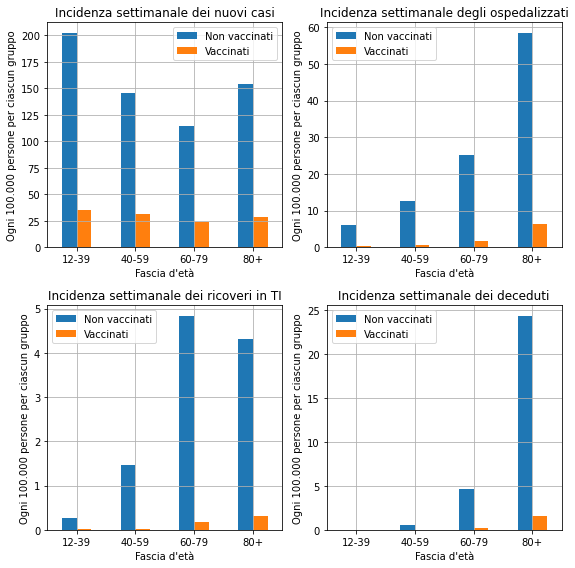

In [20]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0],kind='bar')
axes[0].set_title('Incidenza settimanale dei nuovi casi')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], kind='bar')
axes[1].set_title('Incidenza settimanale degli ospedalizzati')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], kind='bar')
axes[2].set_title('Incidenza settimanale dei ricoveri in TI')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], kind='bar')
axes[3].set_title('Incidenza settimanale dei deceduti')
which_axe(3)

plt.tight_layout()
plt.savefig('risultati/tassi_per_età.png', dpi=300)
plt.show()

### Efficacia dei vaccini

In [21]:
efficacia_contagio = (1 - df_tassi.iloc[:, 1]/df_tassi.iloc[:, 0])*100
efficacia_osp = (1 - df_tassi.iloc[:, 3]/df_tassi.iloc[:, 2])*100
efficacia_terint = (1 - df_tassi.iloc[:, 5]/df_tassi.iloc[:, 4])*100
efficacia_decessi = (1 - df_tassi.iloc[:, 7]/df_tassi.iloc[:, 6])*100

In [22]:
def add_to_plot():
    plt.ylim(70, 100)
    plt.grid()
    plt.xlabel('Fascia d\'età')
    plt.yticks(np.arange(70, 101, 5), ['70%', '75%', '80%', '85%', '90%', '95%', '100%'])

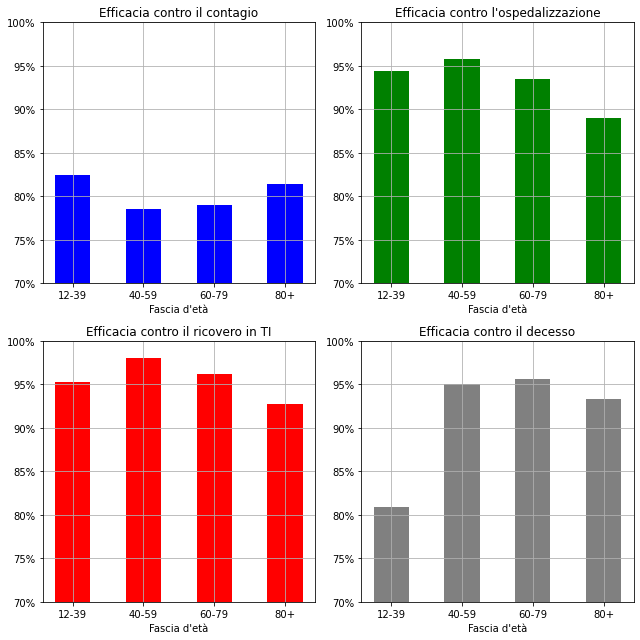

In [23]:
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.bar(efficacia_contagio.index, efficacia_contagio, color='blue', width=0.5)
plt.title('Efficacia contro il contagio')
add_to_plot()

plt.subplot(2, 2, 2)
plt.bar(efficacia_osp.index, efficacia_osp, color='green', width=0.5)
plt.title('Efficacia contro l\'ospedalizzazione')
add_to_plot()

plt.subplot(2, 2, 3)
plt.bar(efficacia_terint.index, efficacia_terint, color='red', width=0.5)
plt.title('Efficacia contro il ricovero in TI')
add_to_plot()

plt.subplot(2, 2, 4)
plt.bar(efficacia_decessi.index, efficacia_decessi, color='gray', width=0.5)
plt.title('Efficacia contro il decesso')
add_to_plot()

plt.tight_layout()
plt.savefig('risultati/efficacia_vaccini.png', dpi=300)
plt.show()

### Grafico riassuntivo

In [24]:
def which_axe_bar(x):
    axes[x].set_ylim(80, 100)
    axes[x].set_yticks(np.arange(70, 101, 5))
    axes[x].set_yticklabels(['70%', '75%', '80%', '85%', '90%', '95%', '100%'])
    axes[x].set_xlabel('Fascia d\'età')
    axes[x].grid()
    for tick in axes[x].get_xticklabels():
        tick.set_rotation(0)


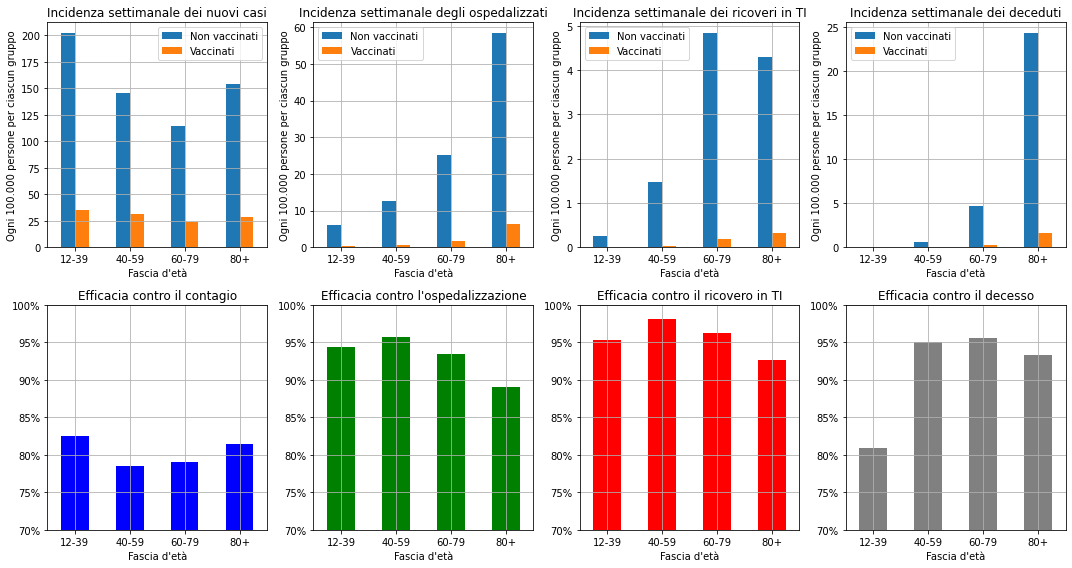

In [25]:
fig, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0],kind='bar')
axes[0].set_title('Incidenza settimanale dei nuovi casi')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], kind='bar')
axes[1].set_title('Incidenza settimanale degli ospedalizzati')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], kind='bar')
axes[2].set_title('Incidenza settimanale dei ricoveri in TI')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], kind='bar')
axes[3].set_title('Incidenza settimanale dei deceduti')
which_axe(3)

efficacia_contagio.plot(kind='bar', ax=axes[4], color='blue')
axes[4].set_title('Efficacia contro il contagio')
which_axe_bar(4)

efficacia_osp.plot(kind='bar', ax=axes[5], color='green')
axes[5].set_title('Efficacia contro l\'ospedalizzazione')
which_axe_bar(5)

efficacia_terint.plot(kind='bar', ax=axes[6], color='red')
axes[6].set_title('Efficacia contro il ricovero in TI')
which_axe_bar(6)

efficacia_decessi.plot(kind='bar', ax=axes[7], color='gray')
axes[7].set_title('Efficacia contro il decesso')
which_axe_bar(7)

plt.tight_layout()
plt.savefig('risultati/tassi_efficacia.png', dpi=300)
plt.show()